## About this Dataset

1. **id**: Unique ID for each news article  
2. **title**: The title of the article  
3. **author**: Author of the news article  
4. **text**: The text of the article (could be incomplete)  
5. **label**: A label that marks whether the news article is fake or real  
   - `0`: Real News  
   - `1`: Fake News  


Importing the libraries

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("dataset/train.csv")

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
y=df['label']

In [7]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [8]:
df.shape

(20800, 5)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer

In [10]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [11]:
df=df.dropna()

In [12]:
messages=df.copy()

In [13]:
messages.reset_index(inplace=True)

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps=PorterStemmer()
corpus=[]
for i in range (0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words('english') ]
    review=' '.join(review)
    corpus.append(review)

In [ ]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [ ]:
from sklearn.feature_extraction.text import  CountVectorizer
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

NameError: name 'corpus' is not defined

In [ ]:
X.shape

(18285, 5000)

In [ ]:
y=messages['label']

In [ ]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer with similar settings as CountVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

# Transform the corpus into TF-IDF features
X = tfidf_vectorizer.fit_transform(corpus).toarray()

# Print the shape of the feature matrix
print("Shape of TF-IDF feature matrix:", X.shape)

# Optional: Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()
print("Sample feature names:", feature_names[:10])

NameError: name 'tfidf' is not defined

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
count_df=pd.DataFrame(X_train,columns=cv.get_feature_names_out())

In [ ]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Confusion matrix, without normalization


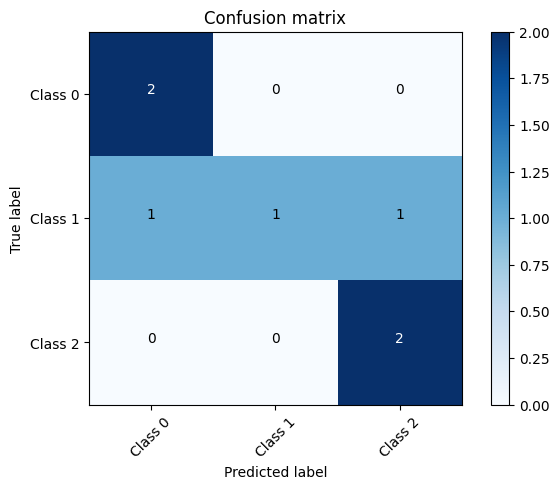

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  # This will display the plot

# Sample data for testing
y_true = [0, 1, 2, 2, 0, 1, 1]  # True labels
y_pred = [0, 0, 2, 2, 0, 2, 1]  # Predicted labels
classes = ['Class 0', 'Class 1', 'Class 2']  # Class names

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Call the plot function
plot_confusion_matrix(cm, classes, normalize=False)


In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression()


In [ ]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.934
Confusion matrix, without normalization


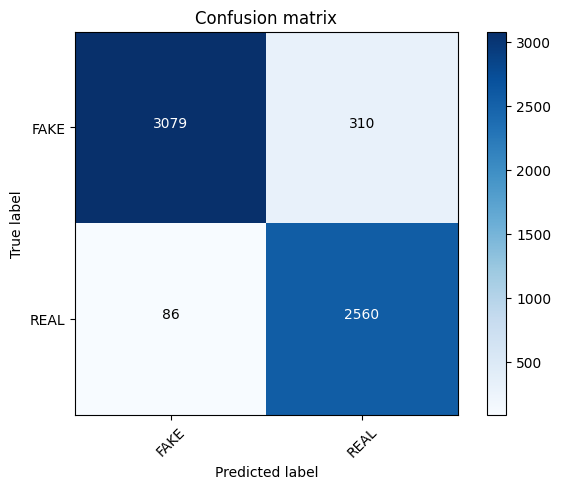

In [ ]:
logistic_clf.fit(X_train, Y_train)
pred = logistic_clf.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Passive Aggressive Classfier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Use max_iter instead of n_iter
linear_clf = PassiveAggressiveClassifier(max_iter=50)


accuracy:   0.919
Confusion matrix, without normalization


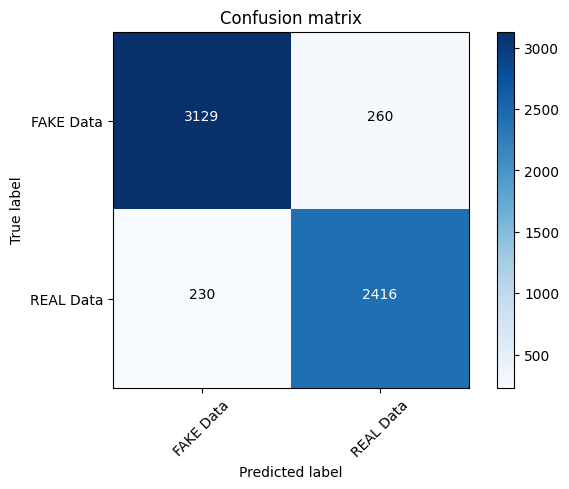

In [ ]:
linear_clf.fit(X_train, Y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Decision Tree 

Accuracy:   0.917
Confusion matrix, without normalization


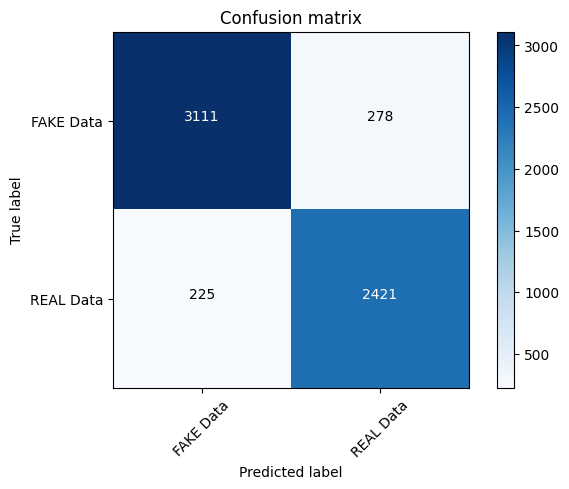

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Initialize the Decision Tree classifier
dt_clf = DecisionTreeClassifier()

# Train the model
dt_clf.fit(X_train, Y_train)

# Make predictions
pred = dt_clf.predict(X_test)

# Calculate accuracy
score = metrics.accuracy_score(Y_test, pred)
print("Accuracy:   %0.3f" % score)

# Compute confusion matrix
cm = metrics.confusion_matrix(Y_test, pred)

# Use your existing function to plot confusion matrix
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])


In [ ]:
import numpy as np
from scipy.special import expit  # For the sigmoid function

def predict_news(news_text: str, threshold: float = 0.7) -> str:
    """
    Predict if the news text is real or fake using Passive-Aggressive, Logistic Regression, and Decision Tree classifiers.
    
    Args:
        news_text (str): The text of the news to classify.
        threshold (float): The threshold for classifying the news as FAKE.
    
    Returns:
        str: "REAL" if the news is real, "FAKE" if the news is fake,
             along with the probabilities of each class from all models.
    """
    # Preprocess the input news text (e.g., vectorize the text)
    vectorized_text = cv.transform([news_text])

    # Passive-Aggressive Classifier Prediction
    pa_decision_values = linear_clf.decision_function(vectorized_text)[0]
    pa_probabilities = expit(pa_decision_values)  
    pa_prediction_label = 'FAKE' if pa_probabilities > threshold else 'REAL'

    # Logistic Regression Prediction
    logistic_prediction = logistic_clf.predict(vectorized_text)
    logistic_probabilities = logistic_clf.predict_proba(vectorized_text)[0][1]  # Probability for FAKE
    logistic_prediction_label = 'FAKE' if logistic_prediction[0] == 1 else 'REAL'

    # Decision Tree Prediction
    dt_prediction = dt_clf.predict(vectorized_text)
    dt_probabilities = dt_clf.predict_proba(vectorized_text)[0][1]  # Probability for FAKE
    dt_prediction_label = 'FAKE' if dt_prediction[0] == 1 else 'REAL'

    # Average the probabilities from all three models for final decision
    avg_probability = (pa_probabilities + logistic_probabilities + dt_probabilities) / 3
    final_prediction_label = 'FAKE' if avg_probability > threshold else 'REAL'

    # Class labels and corresponding probabilities
    classes = ['REAL', 'FAKE']
    class_probabilities_pa = [1 - pa_probabilities, pa_probabilities]  
    class_probabilities_logistic = [1 - logistic_probabilities, logistic_probabilities]  
    class_probabilities_dt = [1 - dt_probabilities, dt_probabilities]  

    # Display probabilities from all models
    print(f"Passive-Aggressive Classifier Probabilities: {dict(zip(classes, class_probabilities_pa))}")
    print(f"Logistic Regression Probabilities: {dict(zip(classes, class_probabilities_logistic))}")
    print(f"Decision Tree Probabilities: {dict(zip(classes, class_probabilities_dt))}")

    # Return the final prediction based on averaged probabilities
    return final_prediction_label


In [ ]:
print(df['title'][0])
print(df['label'][0])
predict_news("""Why the Truth Might Get You Fired""")

House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It
1
Passive-Aggressive Classifier Probabilities: {'REAL': 0.1520734382079838, 'FAKE': 0.8479265617920162}
Logistic Regression Probabilities: {'REAL': 0.032166994746229305, 'FAKE': 0.9678330052537707}
Decision Tree Probabilities: {'REAL': 0.0, 'FAKE': 1.0}


'FAKE'

In [ ]:
import joblib

# Save the Passive-Aggressive Classifier
joblib.dump(linear_clf, 'linear_clf.pkl')

# Save the Logistic Regression model
joblib.dump(logistic_clf, 'logistic_clf.pkl')

# Save the Decision Tree Classifier
joblib.dump(dt_clf, 'decision_tree.pkl')

# Save the vectorizer (CountVectorizer or TfidfVectorizer)
joblib.dump(cv, 'vectorizer.pkl')

print("All models and vectorizer saved successfully!")


All models and vectorizer saved successfully!
